# Assignment 5

Linda Koine, Jens Weidmann, Markus Wiktorin

## Task 1

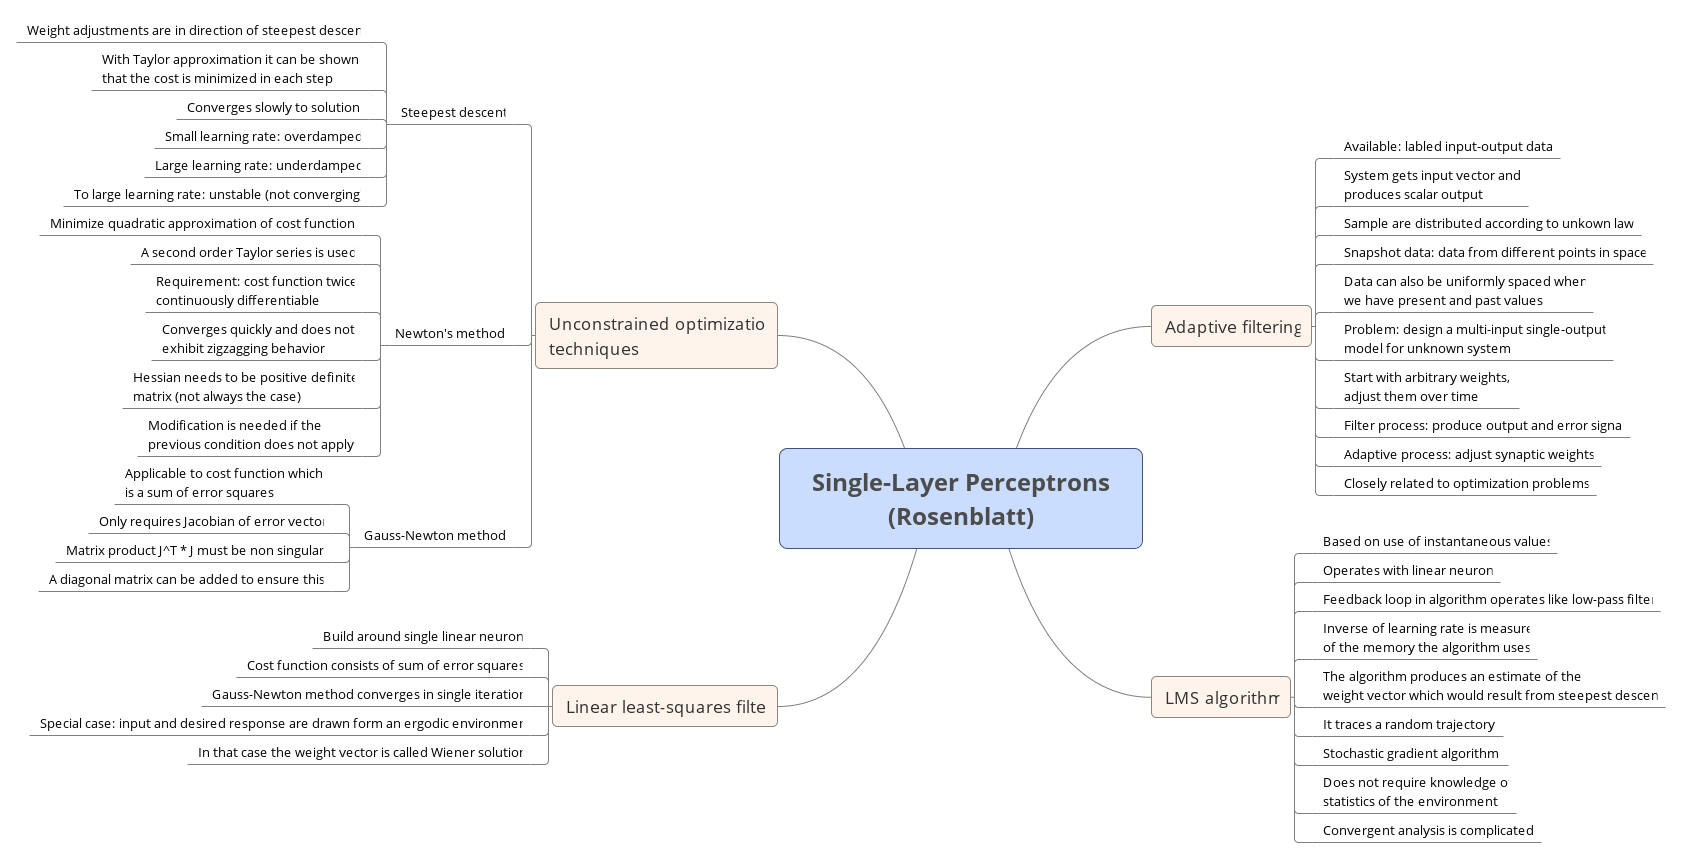

In [1]:
from IPython.display import Image
Image("Single-Layer_Perceptrons.png")

## Task 2 (Haykin 3.1)

In [2]:
import numpy as np
import sympy as sp
sp.init_printing()

In [3]:
w_1,w_2 = sp.symbols("w_1,w_2 ")

r_xd=100;
r_x=100;
o=100;

def function(x,y):
    return (1/2)*o-r_xd*x+(1/2)*r_x*y

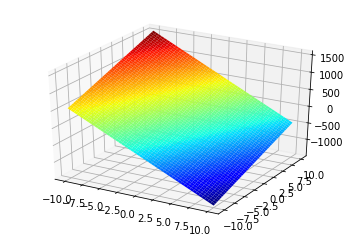

In [4]:
sp.plotting.plot3d(function(w_1,w_2))

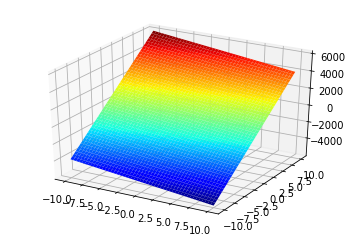

In [5]:
r_xd=100;
r_x=1000;
o=100;

sp.plotting.plot3d(function(w_1,w_2))

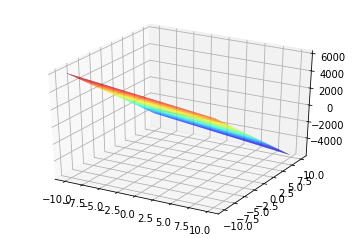

In [6]:
r_xd=100;
r_x=-1000;
o=100;

sp.plotting.plot3d(function(w_1,w_2))

$r_x$ rotates the hyperplane around x axis

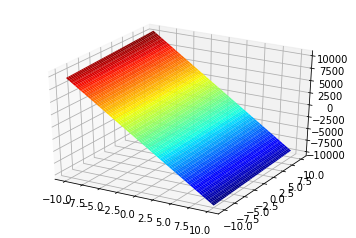

In [7]:
r_xd=1000;
r_x=100;
o=100;

sp.plotting.plot3d(function(w_1,w_2))

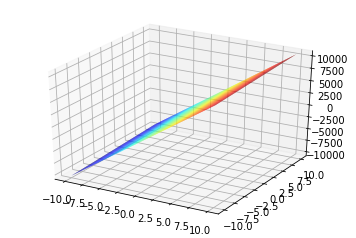

In [8]:
r_xd=-1000;
r_x=100;
o=100;

sp.plotting.plot3d(function(w_1,w_2))

$r_{xd}$ rotates the hyperplane around y axis

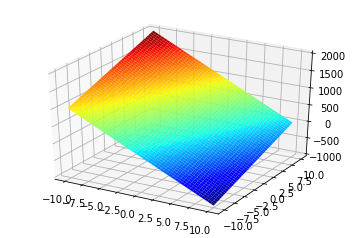

In [9]:
r_xd=100;
r_x=100;
o=1000;

sp.plotting.plot3d(function(w_1,w_2))

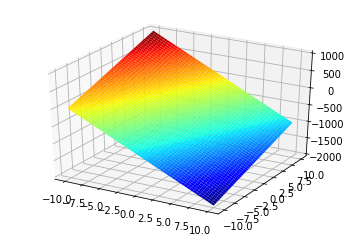

In [10]:
r_xd=100;
r_x=100;
o=-1000;

sp.plotting.plot3d(function(w_1,w_2))

$o$ pushes the hyperplane up and down (bias)

## Task 3 (Haykin 3.2)
### a

In [11]:
import sympy as sp
from scipy.optimize import minimize
from sympy.utilities.lambdify import lambdify
sp.init_printing()

In [12]:
w1 = sp.Symbol("w_1")
w2 = sp.Symbol("w_2")
w = sp.Matrix([[w1], [w2]])
sigma = sp.Symbol("sigma")

r = sp.Matrix([[0.8182], [0.354]])
R = sp.Matrix([[1, 0.8182], [0.8182, 1]])

a = r.transpose() * w
b = w.transpose() * R * w

#cost_func = 0.5 * sigma - a[0] + 0.5 * b[0]
cost_func = - a[0] + 0.5 * b[0]
lambdified = lambdify((w1, w2), cost_func)

def minimizable_function(params):
    w1, w2 = params
    return lambdified(w1, w2)

cost_func

In [13]:
solution = minimize(minimizable_function, [0, 0])
solution

      fun: -0.48524726287868303
 hess_inv: array([[ 2.93450335, -2.42312918],
       [-2.42312918,  2.99531171]])
      jac: array([  3.01748514e-06,   1.37835741e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 1.5990351 , -0.95432915])

In [14]:
w = solution.x
print("w* = ")
w

w* = 


array([ 1.5990351 , -0.95432915])

In the previos code we use scipy to minimize the function. The constant $\sigma^2$ does not matter for the minimization, since it could be chose arbitrarily negative.

### b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def steepest_descent(epsilon, max_iteration, learning_rate, init_guess, function):
    guess = init_guess
    all_guesses = np.array(guess.T)

    counter = 0
    while counter < max_iteration:
        counter = counter + 1
        old_value = function.subs({w1: guess[0], w2: guess[1]})

        steepest_descent = sp.Matrix([[sp.diff(function, w1)],
                                      [sp.diff(function, w2)]]).subs({w1: guess[0], w2: guess[1]})

        guess = guess - learning_rate * steepest_descent
        all_guesses = np.row_stack((all_guesses, guess.T))
        new_value = function.subs({w1: guess[0], w2: guess[1]})

        if abs(new_value - old_value) < epsilon:
            break

    if counter == max_iteration:
        print("Algorithm did not stop, w =", guess)
    else:
        print("Epsilon reached after", counter, "iterations, w =", guess)

    plt.plot(all_guesses[:,0], all_guesses[:,1])
    plt.show()
    return guess

Epsilon reached after 155 iterations, w = Matrix([[1.59881526814624], [-0.954111715181767]])


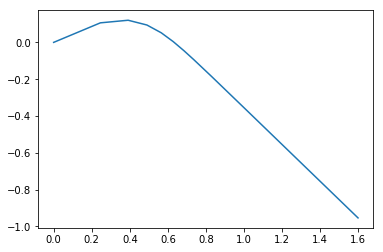

Epsilon reached after 49 iterations, w = Matrix([[1.59897818042613], [-0.954239995718932]])


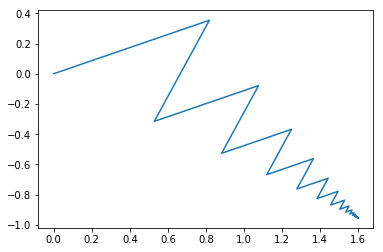

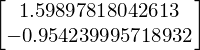

In [24]:
epsilon = 1e-9
max_iteration = 10000


guess = np.array([[0],[0]])

steepest_descent(epsilon, max_iteration, 0.3, guess, cost_func)
steepest_descent(epsilon, max_iteration, 1, guess, cost_func)

## 3.4
### Correlation matrix:
$Rx = 
\begin{bmatrix}
1 & 0.5\\
0.5 & 1\\
\end{bmatrix}
$
### Condition for the learning rate to be convergent: 

$0 < \eta < \frac{1}{lambda_{\mathrm{max}}}\\ or \\0 < \eta < \frac{1}{trace_{\mathrm{Rx}}}$

### Calculate eigenvalues and trace:

In [27]:
m = [[1, 0.5], [0.5, 1]]
eigenv = np.linalg.eig(m)
lambda_max = max(eigenv[0])

trace = np.trace(m)

In [28]:
print("eigenvalues = ", eigenv[0],"\n",
      "trace = ", trace,"\n")

eigenvalues =  [ 1.5  0.5] 
 trace =  2.0 



### Result:
Upperbound (eigenvalues): $\frac{1}{lambda_{\mathrm{max}}} = \frac{1}{1.5} = \frac{2}{3}$   
Upperbound (trace): $\frac{1}{lambda_{\mathrm{max}}} = \frac{1}{2}$  
LMS is converging for (using eigenvalues) : $0 < \eta < \frac{2}{3}$  
LMS is converging for (using trace) : $0 < \eta < \frac{1}{2}$  

## 3.8
### a

$J(w) = \frac{1}{2} \sigma_d^2 - r_{xd}^T w + \frac{1}{2} w^T R_x w$

$J(w) = \frac{1}{2} E[d^2(n)] - E[x(n)d(n)]^T w + \frac{1}{2} w^T E[x(n)x^T(n)] w$

$J(w) = \frac{1}{2} E[d^2(n)] - E[x^T(n) d(n)] w + \frac{1}{2} w^T E[x(n)x^T(n)] w$

$J(w) = \frac{1}{2} E[d^2(n)] - E[x^T(n) d(n)] w + E[\frac{1}{2} w^T x(n) x^T(n) w]$

$J(w) = E[\frac{1}{2} d^2(n) - x^T(n) w d(n) + \frac{1}{2} w^T x(n) x^T(n) w]$

$J(w) = \frac{1}{2} * E[d^2(n) - 2 * x^T(n) w d(n) + w^T x(n) x^T(n) w]$

$J(w) = \frac{1}{2} * E[d^2(n) - 2 * x^T(n) w d(n) + (x^T(n) w)^2]$

$J(w) = \frac{1}{2} * E\left[\left(d(n) - x^T(n) w\right)^2\right]$

### b

$J(w) = \frac{1}{2} * E[d^2(n) - 2 * x^T(n) w d(n) + (x^T(n) w)^2]$

$J'(w) = \frac{1}{2} * E[- 2 * x^T(n) d(n) + x^T(n) * 2 * x^T(n) w]^T$

$J'(w) = E[- x^T(n) d(n) + x^T(n) * x^T(n) w]^T$

$J'(w) = E[- x(n) d(n)] + E[x(n) * x^T(n)] w$

$J'(w) = -r_{xd} + R_x w$

$J'(w) = E[- x^T(n) d(n) + x^T(n) * x^T(n) w]^T$

$J''(w) = E[x^T(n) * x^T(n)]^T$

$J''(w) = E[x(n) * x^T(n)]$

$J''(w) = R_x$